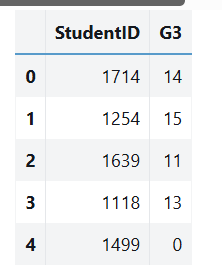

In [ ]:
import pandas as pd
#데이터 로드
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_test.csv")


display(x_train.head())
display(y_train.head())

,StudentID,G3
0,1714,14
1,1254,15
2,1639,11
3,1118,13
4,1499,0


In [ ]:
X_train.shape, y_train.shape, X_test.shape

((678, 33), (678, 2), (366, 33))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   678 non-null    int64 
 1   school      678 non-null    object
 2   sex         678 non-null    object
 3   age         678 non-null    int64 
 4   address     678 non-null    object
 5   famsize     678 non-null    object
 6   Pstatus     678 non-null    object
 7   Medu        678 non-null    int64 
 8   Fedu        678 non-null    int64 
 9   Mjob        678 non-null    object
 10  Fjob        678 non-null    object
 11  reason      678 non-null    object
 12  guardian    678 non-null    object
 13  traveltime  678 non-null    int64 
 14  studytime   678 non-null    int64 
 15  failures    678 non-null    int64 
 16  schoolsup   678 non-null    object
 17  famsup      678 non-null    object
 18  paid        678 non-null    object
 19  activities  678 non-null    object
 20  nursery   

In [ ]:
import pandas as pd
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_test.csv")

X_train = X_train.merge(y_train, on ='StudentID', how ='left')
X_test_id = X_test['StudentID']
target = X_train.pop('G3')


X_train.describe()

#스켈링 불필요
#인코딩 필요
from sklearn.preprocessing import LabelEncoder
cols = X_train.select_dtypes(include='object')
for col in cols :
  le = LabelEncoder()
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.transform(X_test[col])


#데이터 분할 진행
from sklearn.model_selection import train_test_split
X_tr, X_val ,y_tr, y_val = train_test_split(X_train,
                                            target,
                                            test_size = 0.2,
                                            random_state=2025)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape


#바로 학습
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_tr,y_tr)
pred = model.predict(X_val)
pred

#평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error ,r2_score
mse = mean_squared_error(y_val, pred)
mae = mean_absolute_error(y_val, pred)
rmse = root_mean_squared_error(y_val, pred)
mape= mean_absolute_percentage_error(y_val,pred)
r2_score = r2_score(y_val,pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"rmse: {rmse}")
print(f"MAPE : {mape}")
print(f"r2_score : {r2_score}")


# MAPE는 0이 있는 데이터에서는 쓸수 없음!!!! 값이 튀기 때문 그래서 그냥 무시해라


#test 데이터 활용 및 제출
pred = model.predict(X_test)

result = pd.DataFrame({
                      'StudentID' : X_test_id,
                      'G3' : target
})

result.to_csv("12323.csv", index=False)


MSE: 1.886588235294118
MAE: 0.8061764705882353
rmse: 1.3735313011701327
MAPE : 740444762264737.2
r2_score : 0.8811937843027768


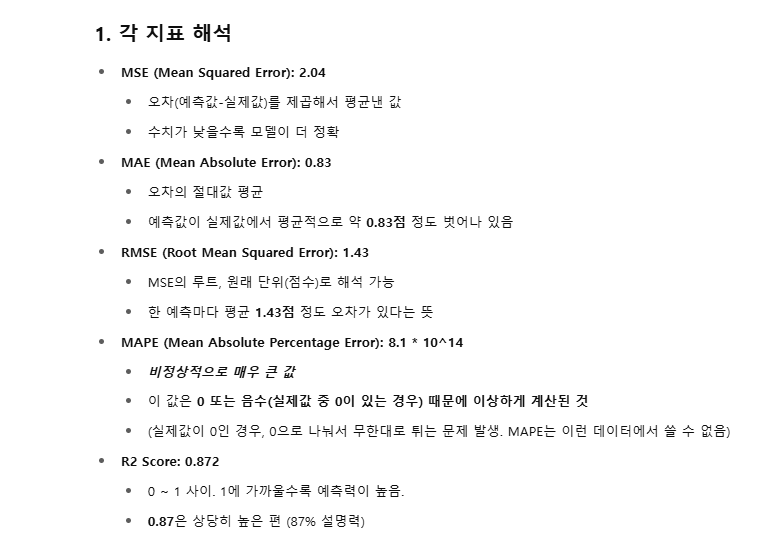

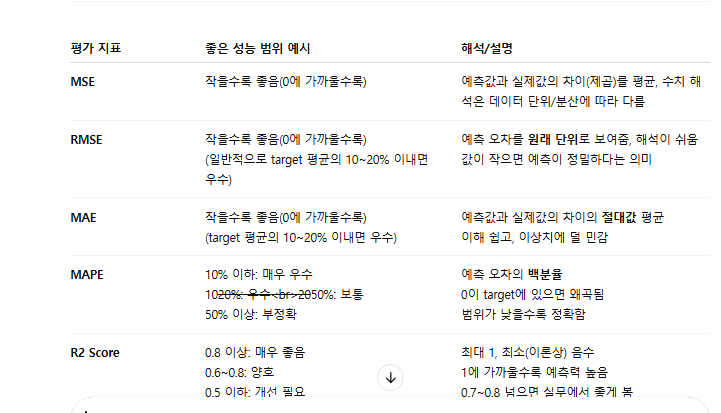

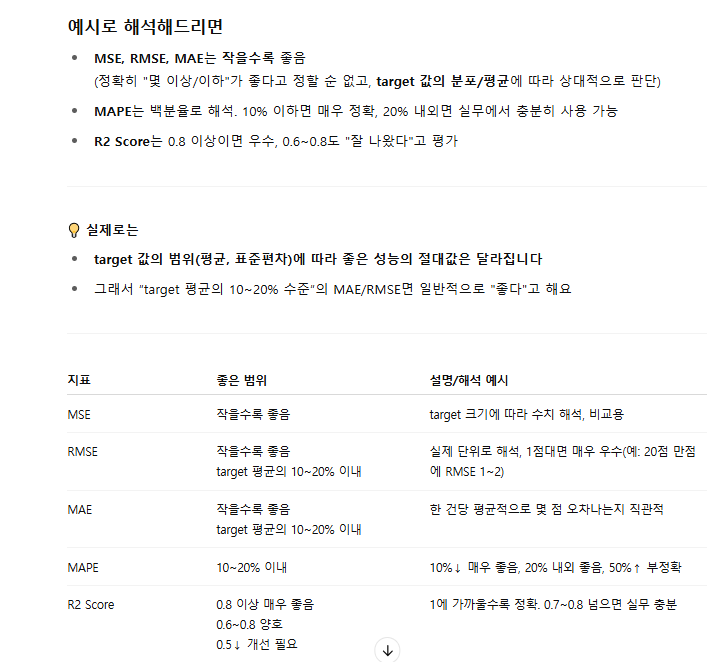

,StudentID,G3
0,1714,14
1,1254,15
2,1639,11
3,1118,13
4,1499,0
...,...,...
673,1074,14
674,1044,11
675,1078,13
676,1055,10
